In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1.DATA PREP :

In [2]:
df = pd.read_csv('train.csv')
print(df.shape)

(19999, 785)


In [6]:
df = pd.read_csv('./mnist_train.csv')

In [7]:
print(df.shape)

(42000, 785)


In [8]:
print(df.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [9]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [10]:
data = df.values # made a matrix ! / numpy array 

In [11]:
print(data)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]


In [12]:
print(data.shape)

(42000, 785)


In [14]:
print(type(data))

<class 'numpy.ndarray'>


In [16]:
X = data[:,1:] # the actual data !
Y = data[:,0] # labels 

In [17]:
print(X.shape)

(42000, 784)


In [18]:
print(Y.shape)

(42000,)


In [19]:
split = int( 0.8*X.shape[0] )
print(split)

X_train = X[:split , :]
Y_train = Y[:split]

X_test = X[split: , :]
Y_test = Y[split:]
print(X_train.shape , Y_train.shape)
print(X_test.shape , Y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


#  can we apply KNN ?
####  we have 784 dimensions !!


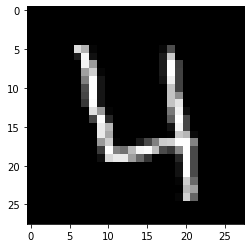

4


In [23]:
def drawImage(sample):
    img = sample.reshape(28,28)
    plt.imshow(img , cmap = 'gray' )
    plt.show()
    
drawImage(X_train[3])
print(Y_train[3])

## training time is O(1) 

In [24]:
def dist(x1,x2):
    return np.sqrt( sum( (x1-x2)**2  )  )
def knn( X , Y , queryPoint , k = 5  ):
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint , X[i] )
        vals.append( (d,Y[i]) ) # it is a tuple !
        
    vals = sorted(vals)
    # Nearest/First K points :
    
    vals = vals[ :k ]
    
    vals = np.array(vals)
    
    print(vals)
    
    new_vals = np.unique( vals[:,1] , return_counts=True  )
    print(new_vals)
        
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    print(pred)
    return pred
    

In [27]:
pred = knn( X_train , Y_train , X_test[8]  )
print(pred)

[[1603.14784097    8.        ]
 [1640.90523797    8.        ]
 [1704.42688315    0.        ]
 [1726.45416968    5.        ]
 [1728.68389245    5.        ]]
(array([0., 5., 8.]), array([1, 2, 2]))
5.0
5.0


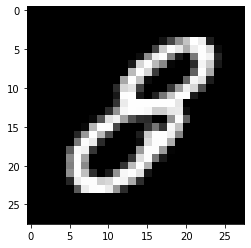

8


In [28]:
drawImage(X_test[8])
print(Y_test[8])